In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.metrics import log_loss
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sksurv.tree import SurvivalTree
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest

In [3]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [4]:
# define three-year mortalitty status
df_train.loc[:,'MORTSTAT3Y'] = np.where((df_train["MORTSTAT"] == 1) & (df_train["TIMETOEVENT"] <= 3), 1, 0)
df_test.loc[:,'MORTSTAT3Y'] = np.where((df_test["MORTSTAT"] == 1) & (df_test["TIMETOEVENT"] <= 3), 1, 0)

In [5]:
# select features and target
X_train = df_train.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_train = df_train['MORTSTAT3Y']

X_test = df_test.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_test_ = df_test['MORTSTAT3Y']

In [6]:
# classification models

In [7]:
# DTC

In [8]:
dtc = DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=50, min_samples_leaf=300)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=50,
                       min_samples_leaf=300)

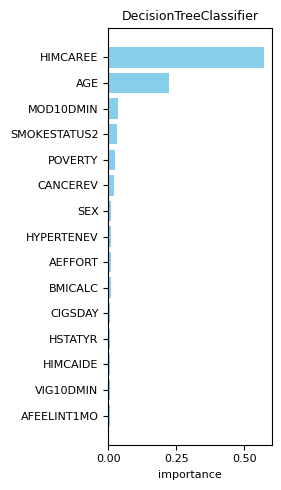

In [9]:
importances_dtc = dtc.feature_importances_

# create DataFrame for feature importance
feature_importance_dtc = pd.DataFrame({'Feature': X_train.columns,'Importance': importances_dtc})

# sort the DataFrame by importance and select the top 15 features
top_features_dtc = feature_importance_dtc.sort_values(by='Importance', ascending=False).head(15)

# ---plot---
plt.figure(figsize=(3, 5))  
plt.barh(top_features_dtc['Feature'], top_features_dtc['Importance'], color='skyblue')
plt.xlabel('importance', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('DecisionTreeClassifier', fontsize=9)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('DecisionTreeClassifier.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# RFC

In [11]:
rfc = RandomForestClassifier(criterion='log_loss', random_state=42,
                             n_estimators=150, max_leaf_nodes=50, max_samples=0.1, max_features=None)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_features=None,
                       max_leaf_nodes=50, max_samples=0.1, n_estimators=150,
                       random_state=42)

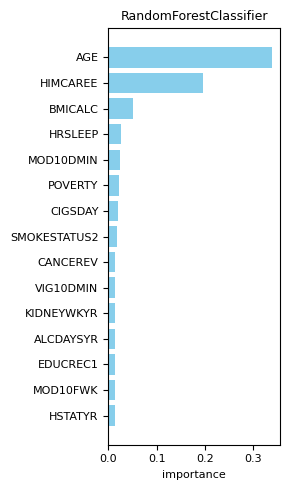

In [12]:
importances_rfc = rfc.feature_importances_

# create DataFrame for feature importance
feature_importance_rfc = pd.DataFrame({'Feature': X_train.columns,'Importance': importances_rfc})

# sort the DataFrame by importance and select the top 15 features
top_features_rfc = feature_importance_rfc.sort_values(by='Importance', ascending=False).head(15)

# ---plot---
plt.figure(figsize=(3, 5))  
plt.barh(top_features_rfc['Feature'], top_features_rfc['Importance'], color='skyblue')
plt.xlabel('importance', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('RandomForestClassifier', fontsize=9)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('RandomForestClassifier.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# GBC

In [14]:
gbc = GradientBoostingClassifier(loss='log_loss', random_state=42,
                                n_estimators=150, learning_rate=0.10, subsample=1, max_leaf_nodes=20, max_features=20)
                                        
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_features=20, max_leaf_nodes=20, n_estimators=150,
                           random_state=42, subsample=1)

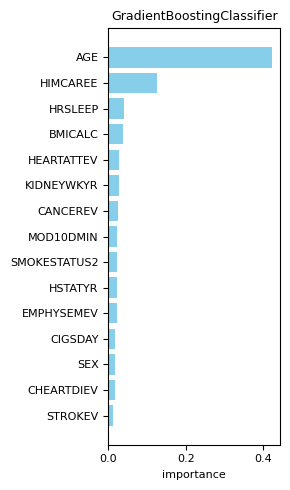

In [15]:
importances_gbc = gbc.feature_importances_

# create DataFrame for feature importance
feature_importance_gbc = pd.DataFrame({'Feature': X_train.columns,'Importance': importances_gbc})

# sort the DataFrame by importance and select the top 15 features
top_features_gbc = feature_importance_gbc.sort_values(by='Importance', ascending=False).head(15)

# ---plot---
plt.figure(figsize=(3, 5))  
plt.barh(top_features_gbc['Feature'], top_features_gbc['Importance'], color='skyblue')
plt.xlabel('importance', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('GradientBoostingClassifier', fontsize=9)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('GradientBoostingClassifier.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# XGBC

In [17]:
xgbc = XGBClassifier(objective='binary:logistic', random_state=42,
                     n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.5, colsample_bytree=0.8)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

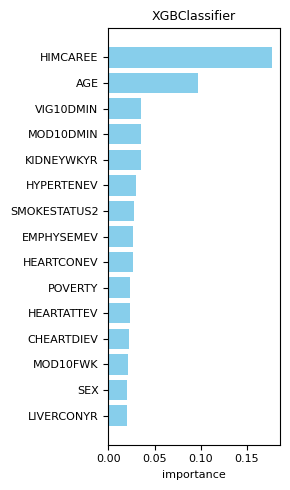

In [18]:
importances_xgbs = xgbc.feature_importances_

# create DataFrame for feature importance
feature_importance_xgbs = pd.DataFrame({'Feature': X_train.columns,'Importance': importances_xgbs})

# sort the DataFrame by importance and select the top 15 features
top_features_xgbc = feature_importance_xgbs.sort_values(by='Importance', ascending=False).head(15)

# ---plot---
plt.figure(figsize=(3, 5))  
plt.barh(top_features_xgbc['Feature'], top_features_xgbc['Importance'], color='skyblue')
plt.xlabel('importance', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('XGBClassifier', fontsize=9)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('XGBClassifier.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

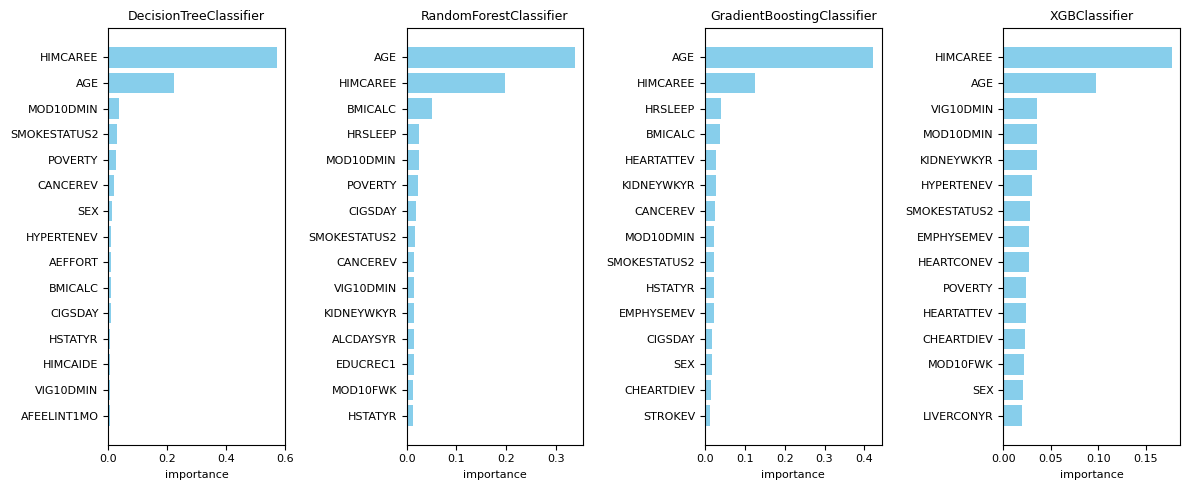

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))  

# ---plot DTC---
axes[0].barh(top_features_dtc['Feature'], top_features_dtc['Importance'], color='skyblue')
axes[0].set_xlabel('importance', fontsize=8)
axes[0].set_title('DecisionTreeClassifier', fontsize=9)
axes[0].invert_yaxis()  
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

# ---plot RFC---
axes[1].barh(top_features_rfc['Feature'], top_features_rfc['Importance'], color='skyblue')
axes[1].set_xlabel('importance', fontsize=8)
axes[1].set_title('RandomForestClassifier', fontsize=9)
axes[1].invert_yaxis()  
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# ---plot GBC---
axes[2].barh(top_features_gbc['Feature'], top_features_gbc['Importance'], color='skyblue')
axes[2].set_xlabel('importance', fontsize=8)
axes[2].set_title('GradientBoostingClassifier', fontsize=9)
axes[2].invert_yaxis()  
axes[2].tick_params(axis='x', labelsize=8)
axes[2].tick_params(axis='y', labelsize=8)

# ---plot SGBC---
axes[3].barh(top_features_xgbc['Feature'], top_features_xgbc['Importance'], color='skyblue')
axes[3].set_xlabel('importance', fontsize=8)
axes[3].set_title('XGBClassifier', fontsize=9)
axes[3].invert_yaxis()  
axes[3].tick_params(axis='x', labelsize=8)
axes[3].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.savefig('FeatureImportances.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
#______________________________________________________________________________________________________________________________

In [21]:
# survival models

In [22]:
# select features
X_surv_train = df_train.drop(columns=['TIMETOEVENT', 'MORTSTAT', 'MORTSTAT3Y'])
X_surv_test = df_test.drop(columns=['TIMETOEVENT', 'MORTSTAT', 'MORTSTAT3Y'])
# select target
y_surv_train = np.array([(event, time) for event, time in zip(df_train['MORTSTAT'], df_train['TIMETOEVENT'])], dtype=[('MORTSTAT', bool), ('TIMETOEVENT', float)])
y_surv_test = np.array([(event, time) for event, time in zip(df_test['MORTSTAT'], df_test['TIMETOEVENT'])], dtype=[('MORTSTAT', bool), ('TIMETOEVENT', float)])

In [23]:
def compute_feature_importance_logloss(model, X, y, i, n_repeats=10):

    # compute baseline survival probabilities at the specified time point
    surv_probs = model.predict_survival_function(X)
    probs_i = np.array([fn(i) for fn in surv_probs]) 
    
    # compute observed event status at the given time point
    event_status_i = np.array([1 if time <= i else 0 for time in y['TIMETOEVENT']])

    # compute baseline log-loss
    baseline_logloss = log_loss(event_status_i, probs_i)

    feature_importance = []

    for col in X.columns:
        permuted_logloss = []
        print(col)
        for _ in range(n_repeats):
            X_permuted = X.copy()
            X_permuted[col] = np.random.permutation(X_permuted[col])  # shuffle one feature
            
            # compute new survival probabilities
            permuted_probs = model.predict_survival_function(X_permuted)
            permuted_probs = np.array([fn(i) for fn in permuted_probs])

            # compute log-loss after permutation
            logloss_permuted = log_loss(event_status_i, permuted_probs)
            permuted_logloss.append(logloss_permuted)

        # feature importance as mean decrease in log-loss
        importance_score = abs(np.mean(permuted_logloss) - baseline_logloss)
        feature_importance.append((col, importance_score))

    # convert to DataFrame
    importance_df = pd.DataFrame(feature_importance, columns=["Feature", "Importance"])
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    return importance_df

In [24]:
# ST

In [25]:
st = SurvivalTree(max_leaf_nodes=50, min_samples_leaf=200)

st.fit(X_surv_train, y_surv_train)

SurvivalTree(max_leaf_nodes=50, min_samples_leaf=200)

In [26]:
# compute feature importance using log-loss at 3 year 
feature_importance_st = compute_feature_importance_logloss(st, X_surv_train, y_surv_train, i=3, n_repeats=10)

REGION
AGE
SEX
MARST
FAMSIZE
RACEA
USBORN
EDUCREC1
POVERTY
FSRAWSCORE
BMICALC
HSTATYR
HINOTCOVE
HIPRIVATEE
HIMCAIDE
HIMCAREE
ARTHGLUPEV
BLIND
CANCEREV
CHEARTDIEV
CPOXEV
DIABETICEV
EMPHYSEMEV
HEARTATTEV
HEARTCONEV
HYPERTENEV
KIDNEYWKYR
LIVERCHRON
LIVERCONYR
STROKEV
ALC5UPYR
ALCAMT
ALCSTAT1
ALCDAYSYR
CIGSDAY
SMOKESTATUS2
MOD10DMIN
MOD10FWK
VIG10DMIN
VIG10FWK
STRONGFWK
HRSLEEP
AEFFORT
AFEELINT1MO
AWORTHLESS
WRYMEDCST
WRYRET


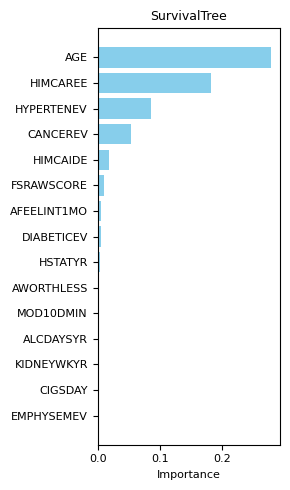

In [27]:
top_features_st = feature_importance_st.sort_values(by='Importance', ascending=False).head(15)

# ---plot---
plt.figure(figsize=(3, 5))
plt.barh(top_features_st['Feature'], top_features_st['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title(f'SurvivalTree', fontsize=9)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('SurvivalTree.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# RSF

In [29]:
rsf = RandomSurvivalForest(random_state=42, n_estimators=100, max_leaf_nodes=50, max_features=30, max_samples=4000)

rsf.fit(X_surv_train, y_surv_train)

RandomSurvivalForest(max_features=30, max_leaf_nodes=50, max_samples=4000,
                     random_state=42)

In [30]:
# compute feature importance using log-loss at 3 year 
feature_importance_rsf = compute_feature_importance_logloss(rsf, X_surv_train, y_surv_train, i=3, n_repeats=10)

REGION
AGE
SEX
MARST
FAMSIZE
RACEA
USBORN
EDUCREC1
POVERTY
FSRAWSCORE
BMICALC
HSTATYR
HINOTCOVE
HIPRIVATEE
HIMCAIDE
HIMCAREE
ARTHGLUPEV
BLIND
CANCEREV
CHEARTDIEV
CPOXEV
DIABETICEV
EMPHYSEMEV
HEARTATTEV
HEARTCONEV
HYPERTENEV
KIDNEYWKYR
LIVERCHRON
LIVERCONYR
STROKEV
ALC5UPYR
ALCAMT
ALCSTAT1
ALCDAYSYR
CIGSDAY
SMOKESTATUS2
MOD10DMIN
MOD10FWK
VIG10DMIN
VIG10FWK
STRONGFWK
HRSLEEP
AEFFORT
AFEELINT1MO
AWORTHLESS
WRYMEDCST
WRYRET


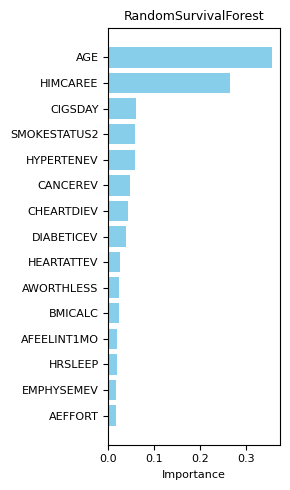

In [31]:
top_features_rsf = feature_importance_rsf.sort_values(by='Importance', ascending=False).head(15)

# ---plot---
plt.figure(figsize=(3, 5))
plt.barh(top_features_rsf['Feature'], top_features_rsf['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title(f'RandomSurvivalForest', fontsize=9)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('RandomSurvivalForest.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# GBS

In [33]:
gbs = GradientBoostingSurvivalAnalysis(loss='coxph', max_depth = None, random_state=42, verbose=2, 
                                        n_estimators=50, learning_rate=0.2, subsample=0.5, max_features=30, max_leaf_nodes=8)

gbs.fit(X_surv_train, y_surv_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       23557.5815          67.6312           47.45m
         2       24291.2750         878.1063           43.37m
         3       24024.4387        -131.1624           41.34m
         4       24476.3964         598.9387           39.99m
         5       23496.3661        -843.8408           38.82m
         6       23290.3886         -74.4262           37.78m
         7       23619.5819         457.6352           36.82m
         8       23552.3510          46.9342           35.91m
         9       23350.2282         -78.3835           35.00m
        10       23407.8594         180.4008           34.07m
        11       23038.8204        -255.9224           33.16m
        12       23381.4034         455.9153           32.36m
        13       22942.4098        -331.6526           31.48m
        14       23086.9956         251.8660           30.60m
        15       23425.4559         445.3409           29.71m
       

GradientBoostingSurvivalAnalysis(learning_rate=0.2, max_depth=None,
                                 max_features=30, max_leaf_nodes=8,
                                 n_estimators=50, random_state=42,
                                 subsample=0.5, verbose=2)

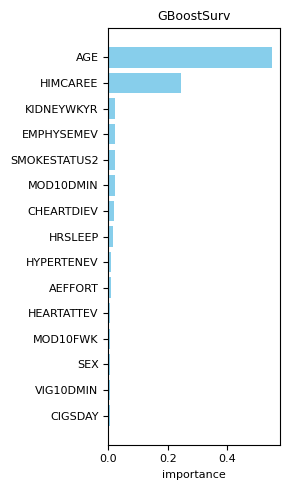

In [34]:
importances_gbs = gbs.feature_importances_

# create DataFrame for feature importance
feature_importance_gbs = pd.DataFrame({'Feature': X_train.columns,'Importance': importances_gbs})

# sort the DataFrame by importance and select the top 15 features
top_features_gbs = feature_importance_gbs.sort_values(by='Importance', ascending=False).head(15)

# ---plot---
plt.figure(figsize=(3, 5))  
plt.barh(top_features_gbs['Feature'], top_features_gbs['Importance'], color='skyblue')
plt.xlabel('importance', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('GBoostSurv', fontsize=9)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('GBoostSurv.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
# suv models all plots

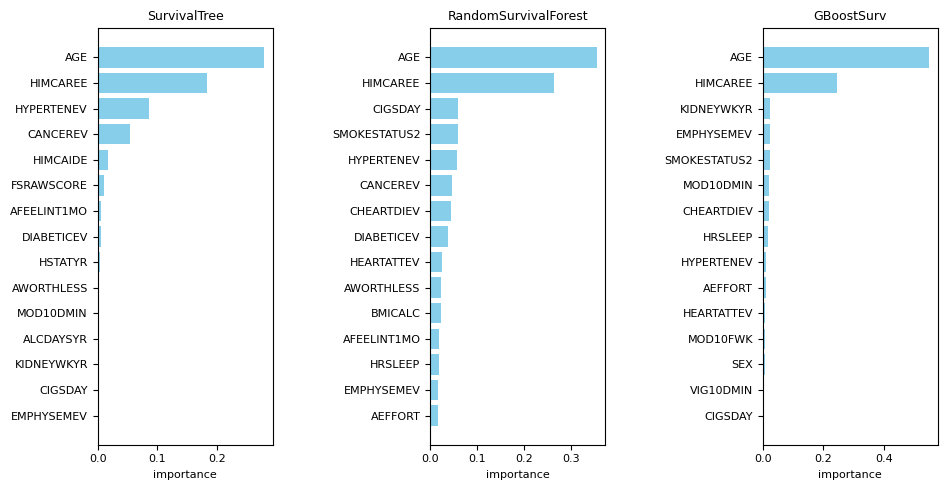

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))  

# ---plot ST---
axes[0].barh(top_features_st['Feature'], top_features_st['Importance'], color='skyblue')
axes[0].set_xlabel('importance', fontsize=8)
axes[0].set_title('SurvivalTree', fontsize=9)
axes[0].invert_yaxis()  
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

# ---plot RSF---
axes[1].barh(top_features_rsf['Feature'], top_features_rsf['Importance'], color='skyblue')
axes[1].set_xlabel('importance', fontsize=8)
axes[1].set_title('RandomSurvivalForest', fontsize=9)
axes[1].invert_yaxis()  
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# ---plot GBS---
axes[2].barh(top_features_gbs['Feature'], top_features_gbs['Importance'], color='skyblue')
axes[2].set_xlabel('importance', fontsize=8)
axes[2].set_title('GBoostSurv', fontsize=9)
axes[2].invert_yaxis()  
axes[2].tick_params(axis='x', labelsize=8)
axes[2].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.85, wspace=0.9)  # Adjust left and right margins
plt.savefig('FeatureImportances_surv.png', format='png', dpi=300, bbox_inches='tight')
plt.show()